<a href="https://colab.research.google.com/github/Mdanish2020/Customer_Segmentation_Project/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **Business Objective**
---
---
Customer Segmentation is a most popular and common technique to used by the most of the e-commerce retail companies. In order to increase top line and bottom line of the company, they need to inspect some things where customer segmentation helps a lot.

The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

Main objective is to find the solution of the following questions:

* **We want to know who my customers are(belongs to which class)**
* **What they like to purchase and in what amount they purchase?**
* **How frequent they purchase?**
* **When they purchase?(Seasonal, Festivals, occasionally)**
* **Which products are sold in large amount.**

Keeping all these things in our mind we can start our analysis, and we can easily target customers.

In [1]:
# importing important libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
# Mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### *Let's invite our data*

In [3]:
# inviting dataset
customer_data = pd.read_excel('/content/drive/MyDrive/Data/Unsupervised/Online Retail.xlsx')

### **Data summary**
---

In [4]:
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# getting shape of our data
customer_data.shape

(541909, 8)

we have 5,41,909 instances and 8 features in our dataset

In [6]:
# getting information of all features 
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# getting all null values and their percentages in each column
null_values = customer_data.isnull().sum()
total = len(customer_data)
null_percent = (null_values/total)*100
null_df = pd.concat([null_values,null_percent],axis = 1,keys = ['Total Null Values','Percentage %'])
null_df

,Total Null Values,Percentage %
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.268311
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,24.926694
Country,0,0.000000


**Around 24.93% customer IDs are missing in our dataset and 0.268% product descriptions are missing these are such features that we cannot impute with other values because customer IDs are unique for each customer, so we have to drop these instances.**

In [8]:
customer_data.dropna(axis = 0, inplace = True)

In [9]:
customer_data.shape

(406829, 8)

**Now, we have left with 4,06,829 instances in our dataset after dropping null values.**  

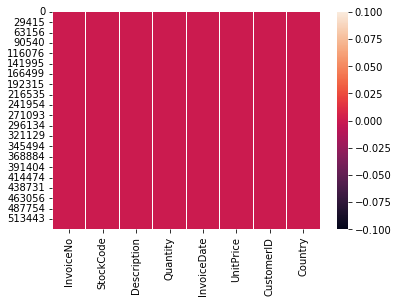

In [11]:
# visualizing null values 
sns.heatmap(customer_data.isnull())

It can be easily in the heatmap that null values are removed from the data.

### Descriptive Statistics

In [12]:
customer_data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


From the above descriptive statistics as it can be seen that we are dealing with outliers here, in this case median would be the best measure of central tendency to consider.
* Customers usually buy 5 quantity of products.
* Companies get paid by the customer for one unit is about 1.95.

In [111]:
# Introducing new features(Invoice_year,Invoice_Month,Invoice_Day,Invoice_Hour) from InvoiceDate column
import datetime as dt
customer_data["Invoice_Year"] = customer_data['InvoiceDate'].dt.year
customer_data['Invoice_Month'] = customer_data['InvoiceDate'].dt.strftime('%B')
customer_data['Invoice_Day'] = customer_data['InvoiceDate'].dt.strftime('%A')
customer_data['Invoice_Hour'] = customer_data['InvoiceDate'].dt.hour

In [112]:
customer_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8


In [15]:
customer_data.shape

(406829, 12)

---
## **EXPLORATORY DATA ANALYSIS**
---
---
### **UNIVARIATE ANALYSIS**

In [18]:
numerical_features = list(customer_data.select_dtypes(['int64','float64']))
numerical_features

['Quantity',
 'UnitPrice',
 'CustomerID',
 'Invoice_Year',
 'Invoice_Month',
 'Invoice_Day',
 'Invoice_Hour']

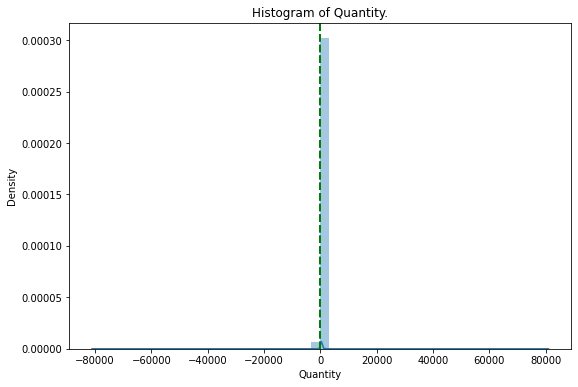

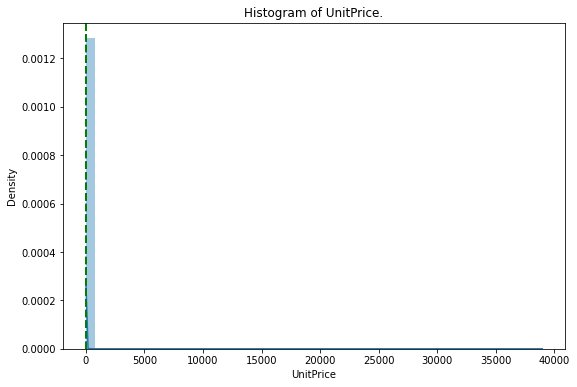

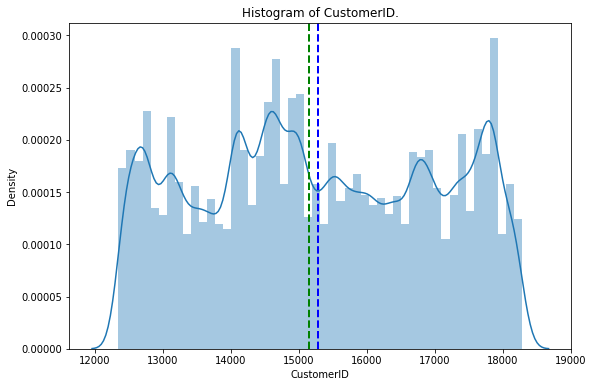

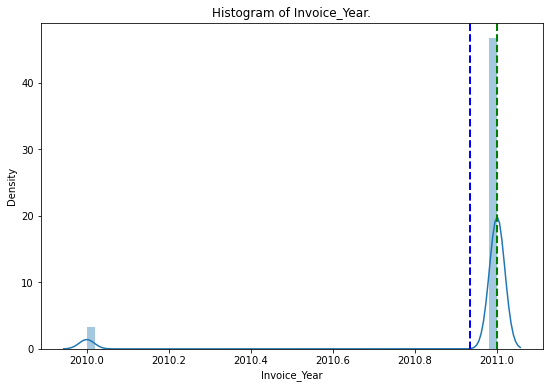

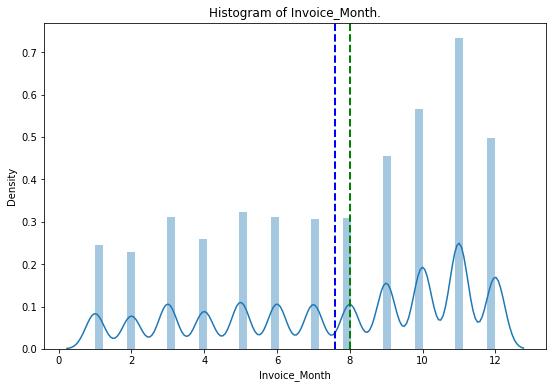

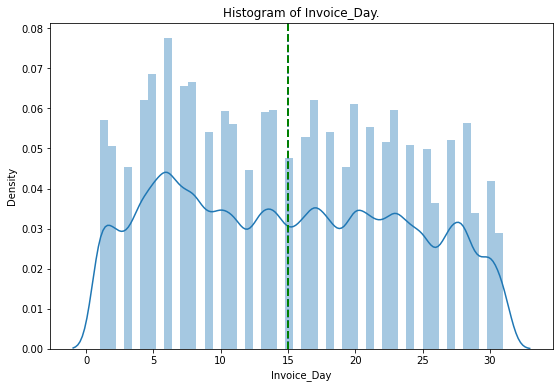

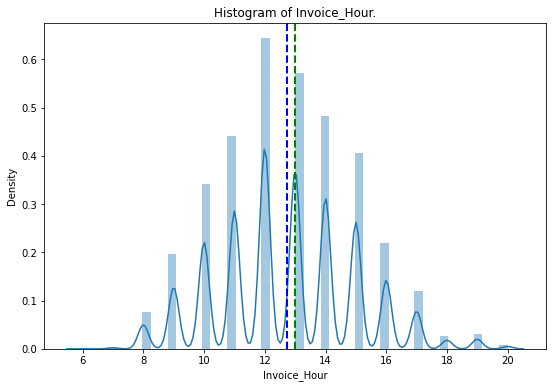

In [22]:
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature = (customer_data[col])
  sns.distplot(customer_data[col],ax = ax)
  ax.axvline(feature.mean(),color='blue', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='green', linestyle='dashed', linewidth=2)
  ax.set_title(f'Histogram of {col}.')
  plt.show()

### **TOP CUSTOMERS**

In [97]:
top_customers = pd.DataFrame(customer_data['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
top_customers.rename(columns = {'index':'CustomerID','CustomerID':'count'},inplace = True)
top_customers.head(5)

,CustomerID,count
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782


Text(0.5, 1.0, "Top 5 Cusotmer's ID.")

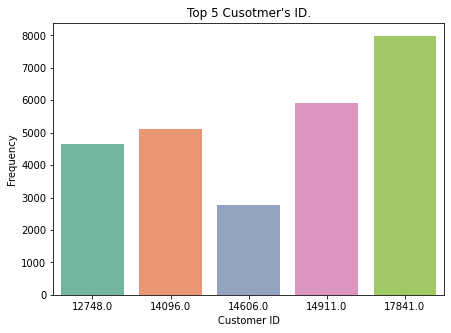

In [98]:
# Plotting top five customers 
plt.figure(figsize = (7,5))
sns.barplot(x = 'CustomerID',y = 'count',palette= 'Set2',data = top_customers[:5])
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.title("Top 5 Cusotmer's ID.")

In [37]:
customer_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Year', 'Invoice_Month',
       'Invoice_Day', 'Invoice_Hour'],
      dtype='object')

### **TOP COUNTRIES**

In [90]:
top_countries = pd.DataFrame(customer_data['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries.rename(columns = {'index':'Country','Country':'Total Counts'},inplace = True)
top_countries.head(5)

,Country,Total Counts
0,United Kingdom,361878
1,Germany,9495
2,France,8491
3,EIRE,7485
4,Spain,2533


Text(0.5, 1.0, 'Top 5 Countries.')

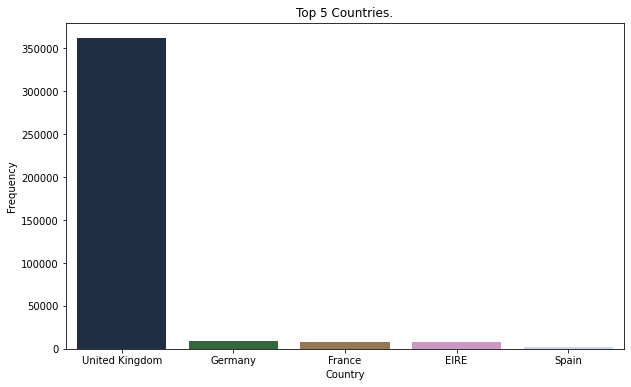

In [102]:
# Plotting top five Countries 
plt.figure(figsize = (10,6))
sns.barplot(x = 'Country',y = 'Total Counts',palette= 'cubehelix',data = top_countries[:5])
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title("Top 5 Countries.")

### **TOP MONTHS**

In [117]:
# Creating dataframe for Invoice_Months counts
top_months = pd.DataFrame(customer_data['Invoice_Month'].value_counts().sort_values(ascending = False).reset_index())
top_months.rename(columns = {'index':'Invoice_Month','Invoice_Month':'Total Frequency'},inplace = True)
top_months.head(5)

,Invoice_Month,Total Frequency
0,November,65598
1,October,50695
2,December,44511
3,September,40822
4,May,28908


Text(0.5, 1.0, 'Top 5 Purchasing Months.')

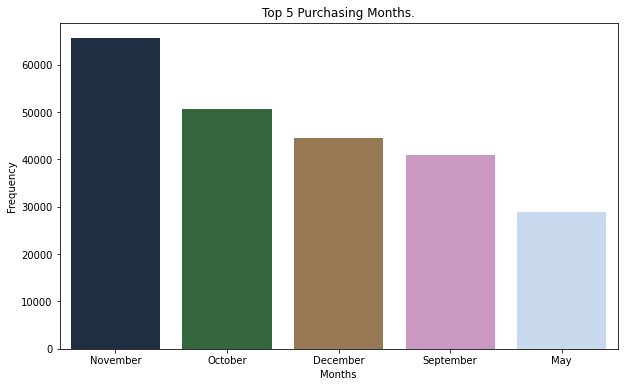

In [118]:
# Plotting top five Countries 
plt.figure(figsize = (10,6))
sns.barplot(x = 'Invoice_Month',y = 'Total Frequency',palette= 'cubehelix',data = top_months[:5])
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title("Top 5 Purchasing Months.")

### **TOP DAYS**

In [119]:
# Creating dataframe for Invoice_Months counts
top_days = pd.DataFrame(customer_data['Invoice_Day'].value_counts().sort_values(ascending = False).reset_index())
top_days.rename(columns = {'index':'Invoice_Day','Invoice_Day':'Total Frequency'},inplace = True)
top_days.head(5)

,Invoice_Day,Total Frequency
0,Thursday,82374
1,Wednesday,70599
2,Tuesday,68110
3,Monday,66382
4,Sunday,63237


Text(0.5, 1.0, 'Purchasing on different Days.')

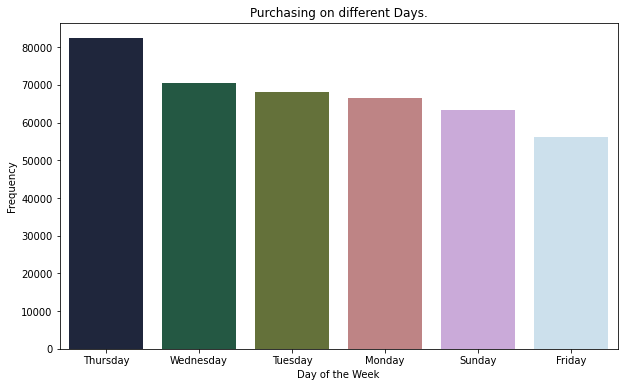

In [120]:
#  
plt.figure(figsize = (10,6))
sns.barplot(x = 'Invoice_Day',y = 'Total Frequency',palette= 'cubehelix',data = top_days)
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title("Purchasing on different Days.")

### **TOP HOURS**

In [121]:
# Creating dataframe for Invoice_Months counts
top_hours = pd.DataFrame(customer_data['Invoice_Hour'].value_counts().sort_values(ascending = False).reset_index())
top_hours.rename(columns = {'index':'Invoice_Hour','Invoice_Hour':'Total Frequency'},inplace = True)
top_hours.head(5)

,Invoice_Hour,Total Frequency
0,12,73342
1,13,65062
2,14,55075
3,11,50249
4,15,46220


Text(0.5, 1.0, 'Purchasing Hours.')

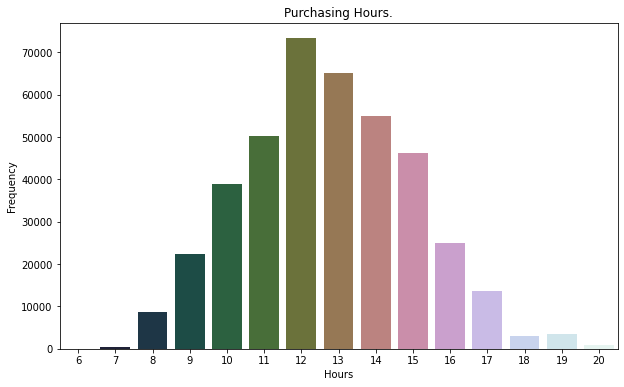

In [130]:
# Plotting purchases at different hours
plt.figure(figsize = (10,6))
sns.barplot(x = 'Invoice_Hour',y = 'Total Frequency',palette= 'cubehelix',data = top_hours)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title("Purchasing Hours.")